In [1]:
import matplotlib.pyplot as plt
import random
import torch

from datasets import load_dataset
from clip.clip import load
from concept_extraction.concept_extraction import (
    load_concepts,
    load_sae,
    prepare_image,
    prepare_image_from_datasets,
    extract_concepts,
    extract_embedding,
    find_neighbours,
    visualize_neighbours_with_distances,
    extract_sae_activations,
    find_neighbours_sae,
)

/Users/gasparsekula/anaconda3/envs/spire/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading models and concept names

In [2]:
concept_names = load_concepts("concept_names/clip_ViT-B_16_concept_names.csv")

In [3]:
ViT_B_16_clip, image_transfrom = load("ViT-B/16")

In [4]:
sparse_autoencoder = load_sae(
    "sae_checkpoints/clip_ViT-B_16_sparse_autoencoder_final.pt"
)

# Example

In [5]:
image, image_transformed = prepare_image("sample_image.JPEG", image_transfrom)

## Image

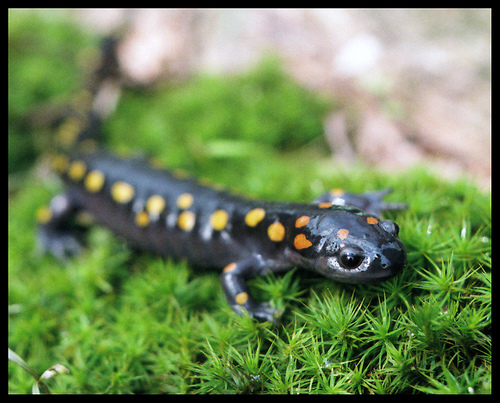

In [6]:
image

In [7]:
N_CONCEPTS = 10

top_n_concept_activations, top_n_concept_names = extract_concepts(
    n_concepts=N_CONCEPTS,
    concept_names=concept_names,
    image_transformed=image_transformed,
    clip_model=ViT_B_16_clip,
    sae=sparse_autoencoder,
)

## Concepts

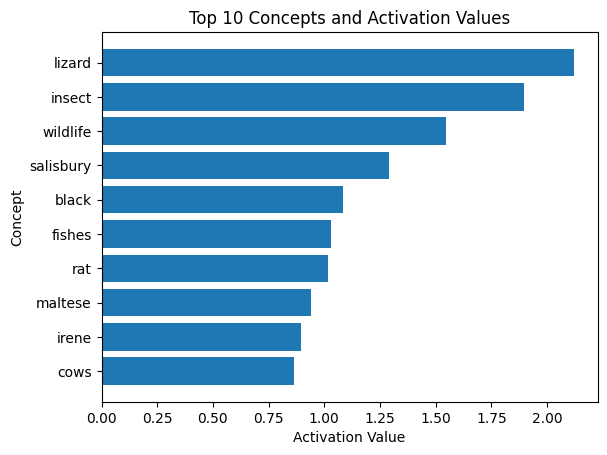

In [8]:
plt.barh(top_n_concept_names, top_n_concept_activations)
plt.xlabel("Activation Value")
plt.ylabel("Concept")
plt.title(f"Top {N_CONCEPTS} Concepts and Activation Values")
plt.show()

# More examples

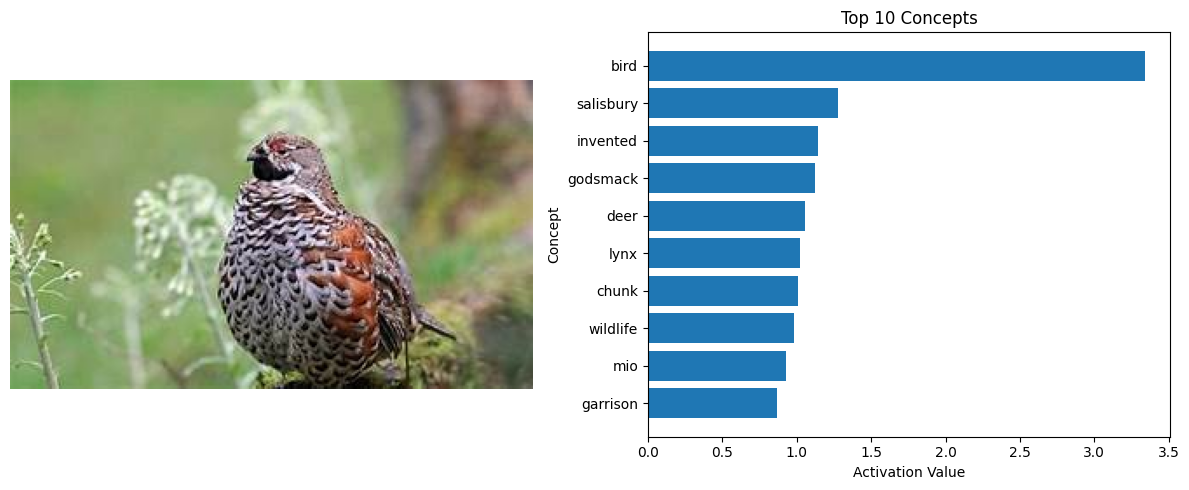

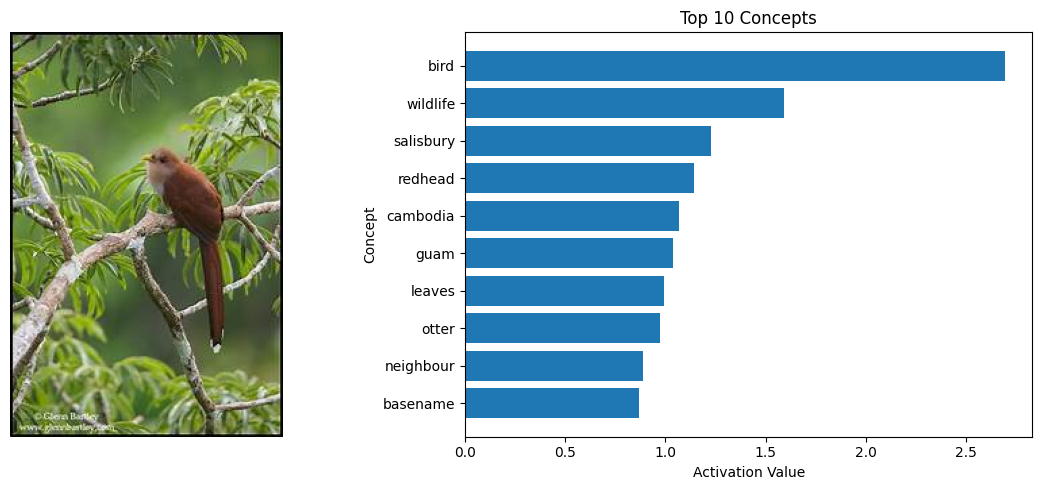

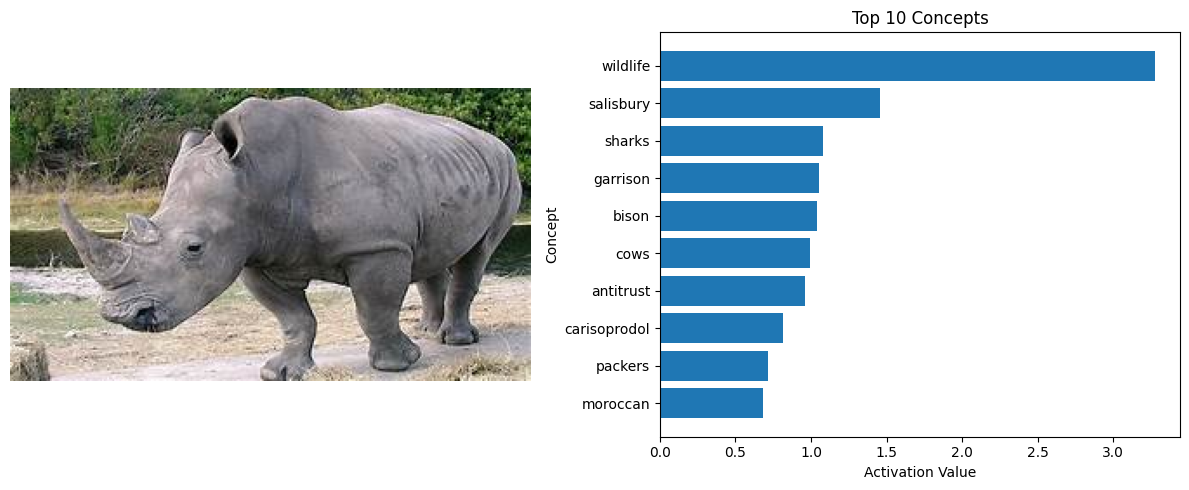

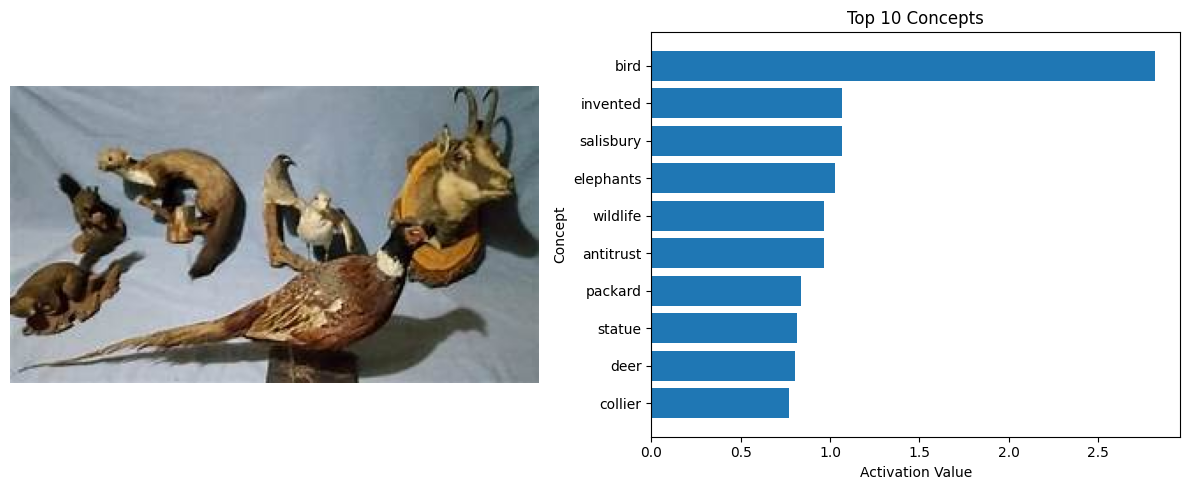

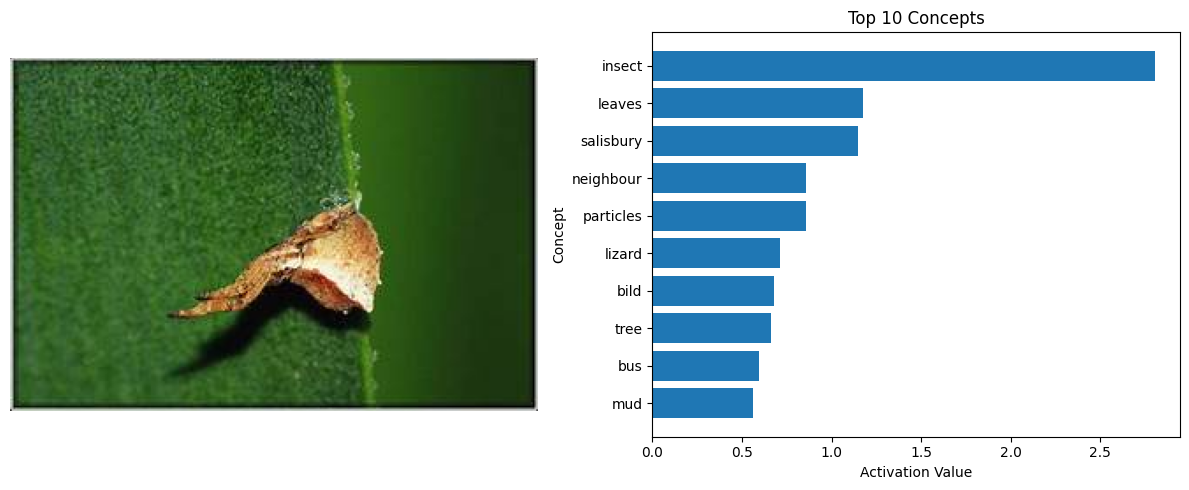

In [9]:
dataset = load_dataset("Rapidata/Other-Animals-10", split="train")
samples = random.sample(list(dataset), 5)
N_CONCEPTS = 10

for sample in samples:
    image = sample["image"]
    image, image_transformed = prepare_image_from_datasets(image, image_transfrom)

    top_n_concept_activations, top_n_concept_names = extract_concepts(
        n_concepts=N_CONCEPTS,
        concept_names=concept_names,
        image_transformed=image_transformed,
        clip_model=ViT_B_16_clip,
        sae=sparse_autoencoder,
    )

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].imshow(image)
    axs[0].axis("off")

    axs[1].barh(top_n_concept_names, top_n_concept_activations)
    axs[1].set_xlabel("Activation Value")
    axs[1].set_ylabel("Concept")
    axs[1].set_title(f"Top {N_CONCEPTS} Concepts")

    plt.tight_layout()
    plt.show()

# CLIP Smiliarities

In [6]:
dataset = load_dataset("jxie/stl10", split="train")
samples = random.sample(list(dataset), 100)
embeddings_list = []
for sample in samples:
    image = sample["image"]
    image, image_transformed = prepare_image_from_datasets(image, image_transfrom)
    embedding = extract_embedding(image_transformed=image_transformed, clip_model=ViT_B_16_clip)
    embeddings_list.append(embedding)

In [7]:
embeddings = torch.stack(embeddings_list)
query_image_idx = 21
query_embedding = embeddings[query_image_idx].unsqueeze(0)

nearest_idx, nearest_similarities, farthest_idx, farthest_similarities = find_neighbours(
    query_embedding.detach().numpy(), 
    embeddings.detach().numpy(), query_image_idx
)

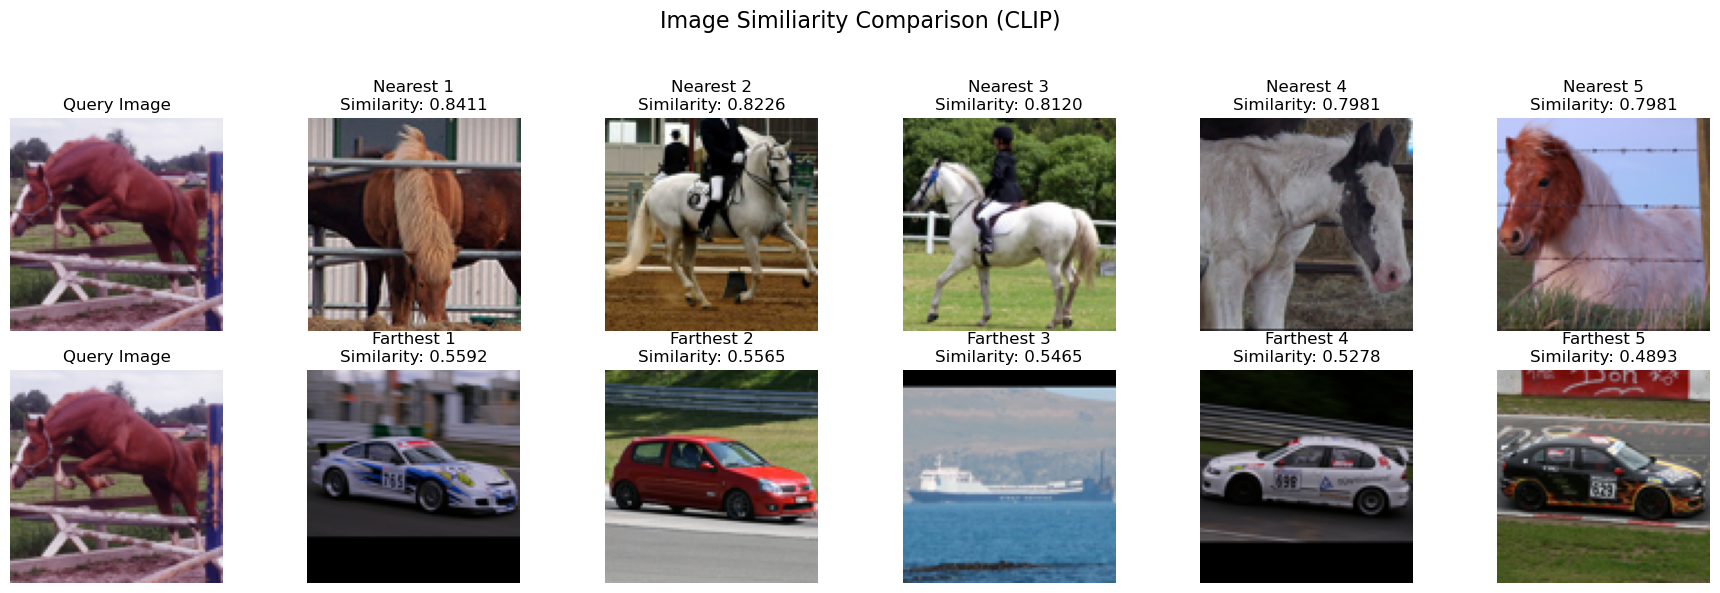

In [8]:
visualize_neighbours_with_distances(
    samples, 
    query_idx=query_image_idx,
    nearest_indices=nearest_idx, 
    nearest_similarities=nearest_similarities,
    farthest_indices=farthest_idx, 
    farthest_similarities=farthest_similarities,
)

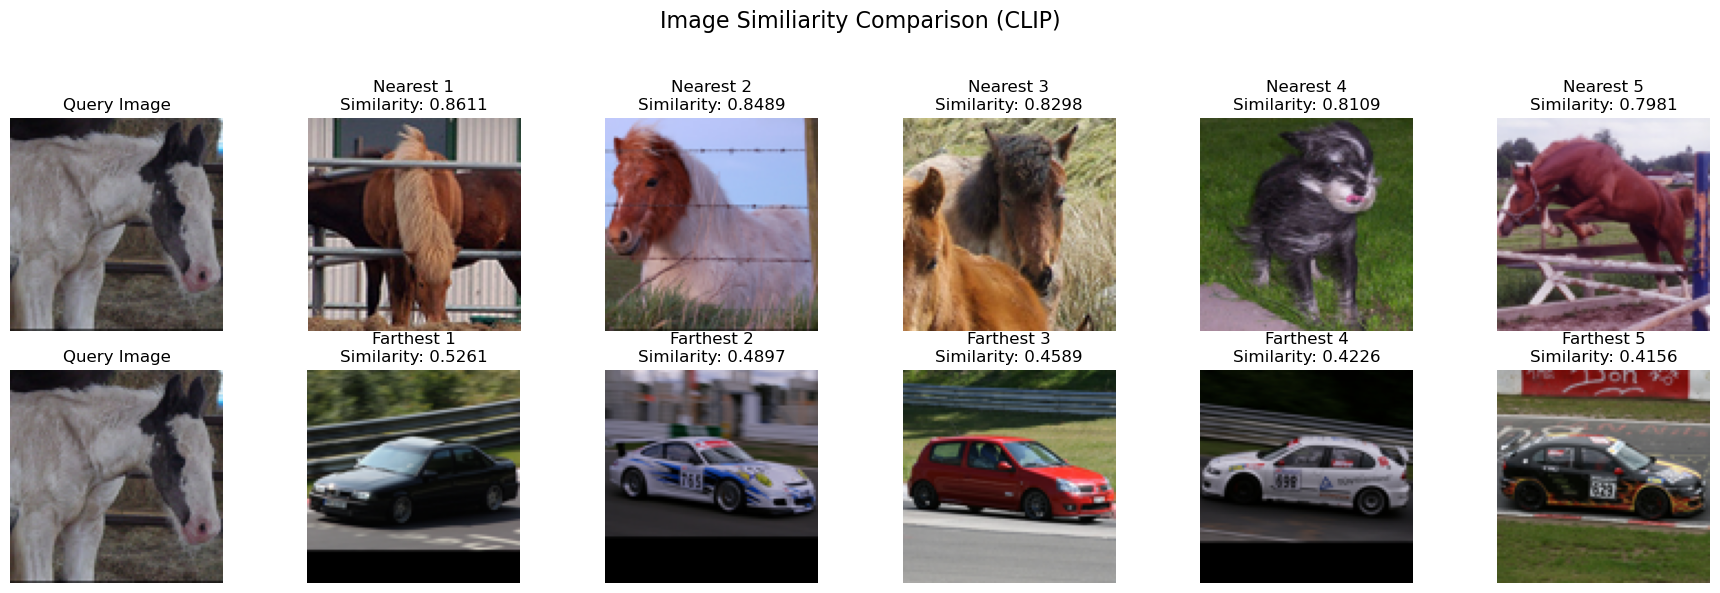

In [9]:
query_image_idx = 37
query_embedding = embeddings[query_image_idx].unsqueeze(0)

nearest_idx, nearest_similarities, farthest_idx, farthest_similarities = find_neighbours(
    query_embedding.detach().numpy(), 
    embeddings.detach().numpy(), query_image_idx
)
visualize_neighbours_with_distances(
    samples, 
    query_idx=query_image_idx,
    nearest_indices=nearest_idx, 
    nearest_similarities=nearest_similarities,
    farthest_indices=farthest_idx, 
    farthest_similarities=farthest_similarities,
)

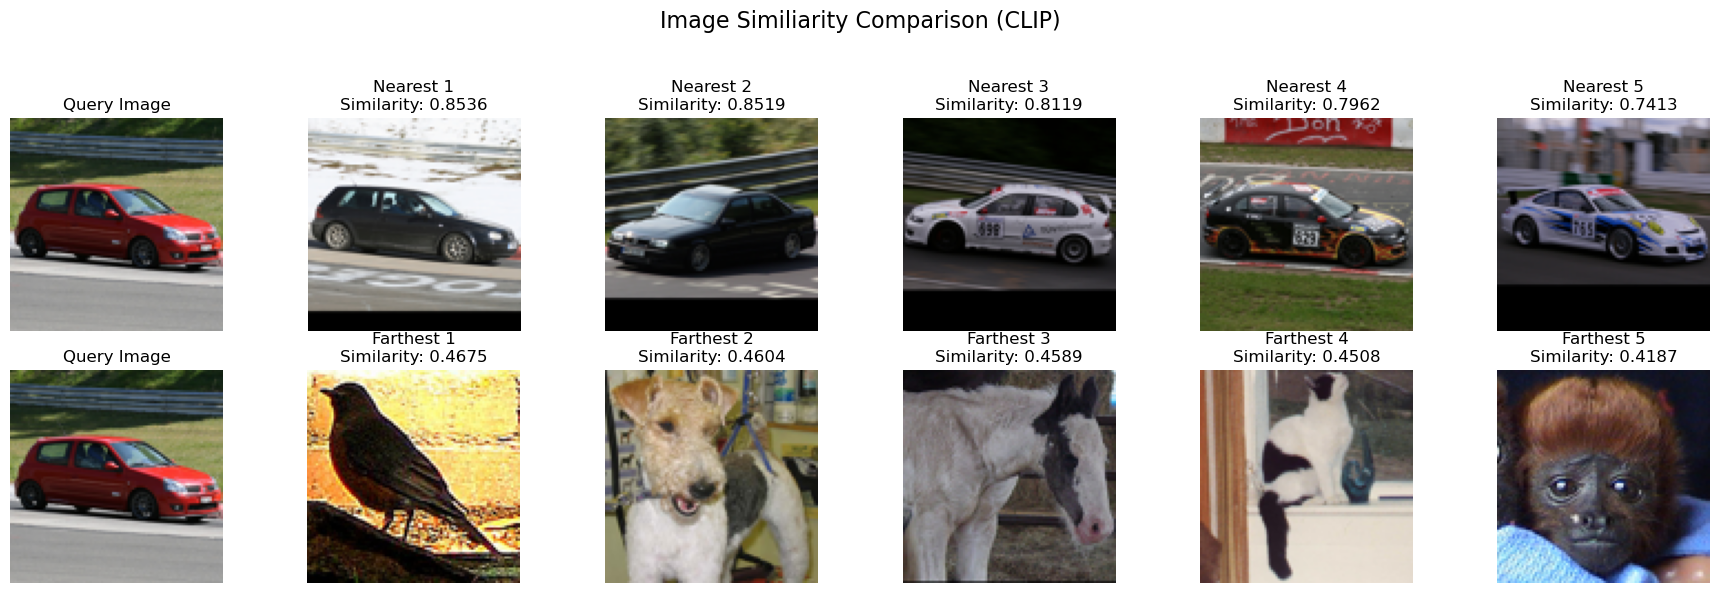

In [10]:
query_image_idx = 69
query_embedding = embeddings[query_image_idx].unsqueeze(0)

nearest_idx, nearest_similarities, farthest_idx, farthest_similarities = find_neighbours(
    query_embedding.detach().numpy(), 
    embeddings.detach().numpy(), query_image_idx
)
visualize_neighbours_with_distances(
    samples, 
    query_idx=query_image_idx,
    nearest_indices=nearest_idx, 
    nearest_similarities=nearest_similarities,
    farthest_indices=farthest_idx, 
    farthest_similarities=farthest_similarities,
)

# SAE similarities

In [11]:
sae_activation_list = []
for embedding in embeddings_list:
    activation = extract_sae_activations(embedding, sparse_autoencoder)
    sae_activation_list.append(activation)
sae_activations = torch.stack(sae_activation_list)


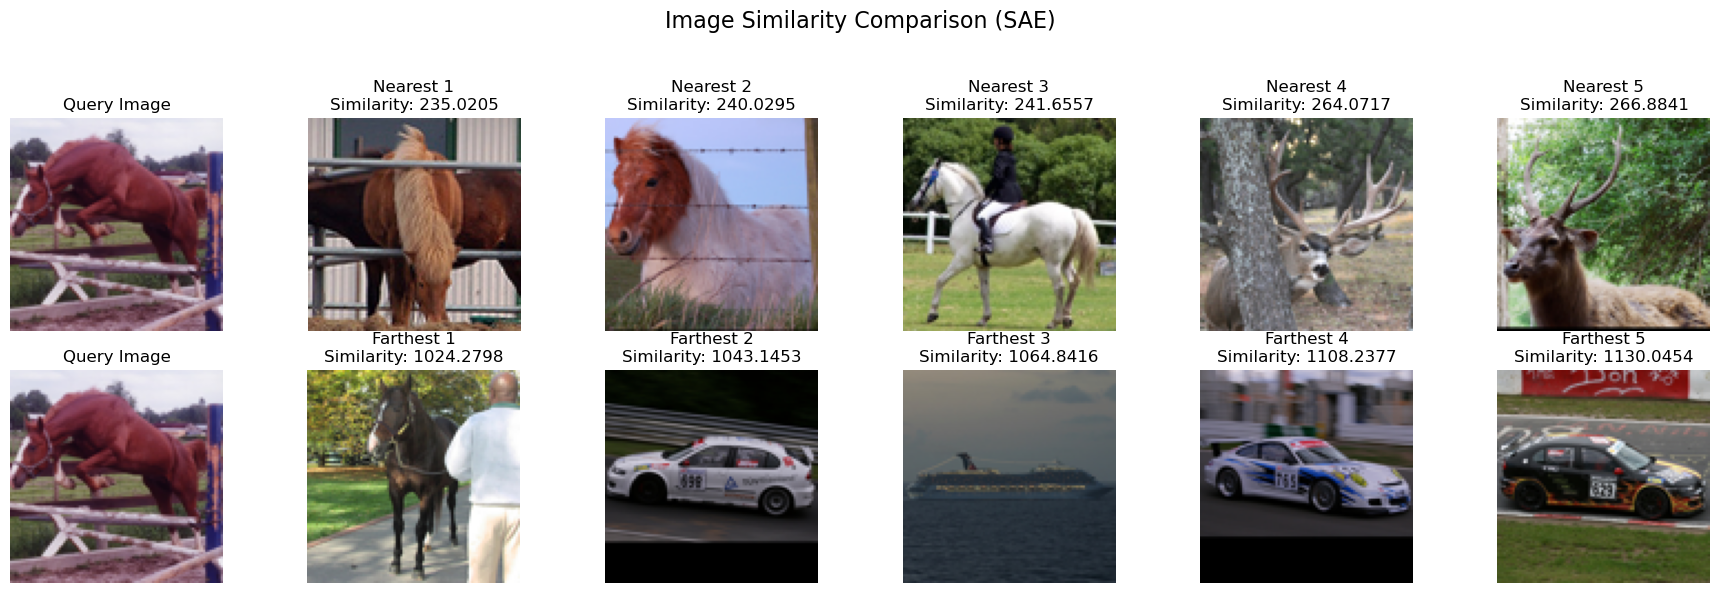

In [12]:
query_image_idx = 21
query_activation = sae_activations[query_image_idx].unsqueeze(0)
nearest_idx, nearest_similarities, farthest_idx, fartherst_similarities = find_neighbours_sae(
    query_activation.detach().numpy(), 
    sae_activations.detach().numpy(), 
    query_image_idx
)
visualize_neighbours_with_distances(
    samples, 
    query_idx=query_image_idx,
    nearest_indices=nearest_idx, 
    nearest_similarities=nearest_similarities,
    farthest_indices=farthest_idx, 
    farthest_similarities=fartherst_similarities,
    title="Image Similarity Comparison (SAE)"
)

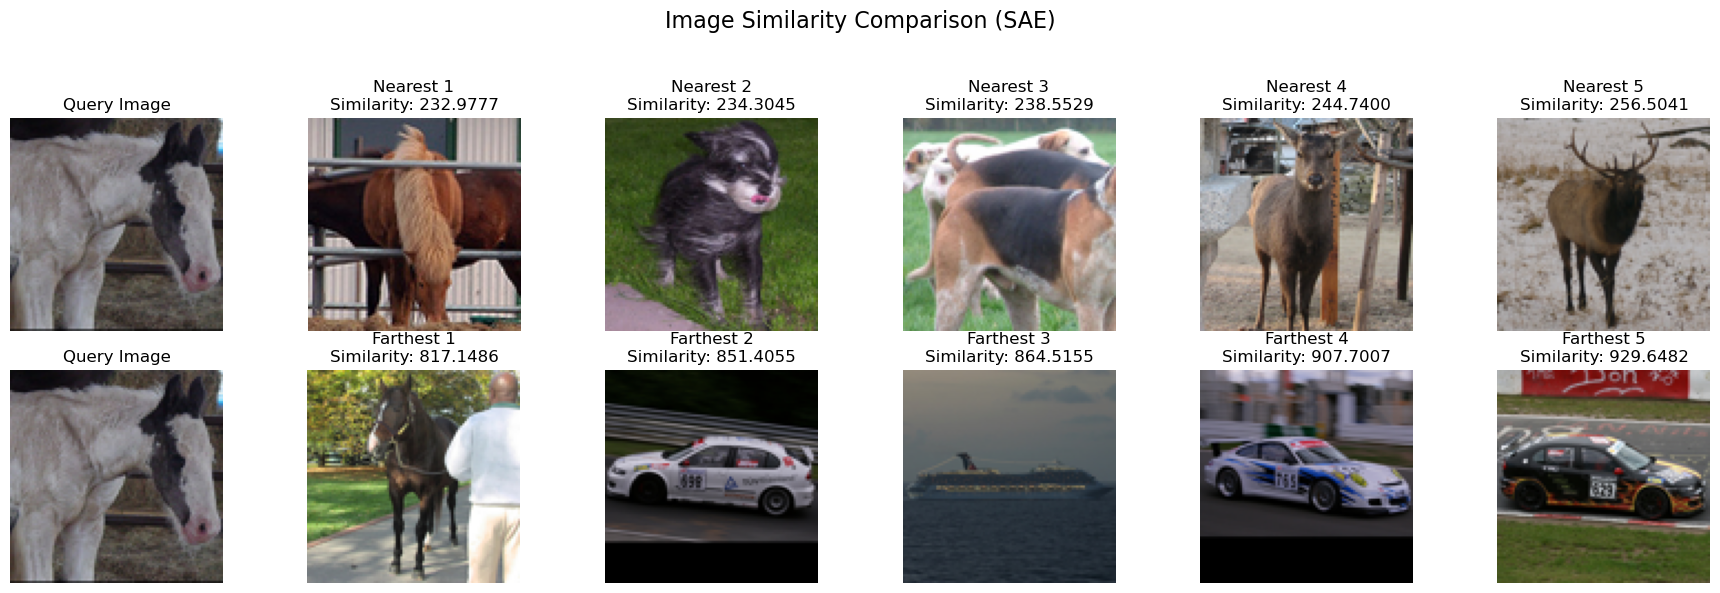

In [13]:
query_image_idx = 37
query_activation = sae_activations[query_image_idx].unsqueeze(0)
nearest_idx, nearest_similarities, farthest_idx, fartherst_similarities = find_neighbours_sae(
    query_activation.detach().numpy(), 
    sae_activations.detach().numpy(), 
    query_image_idx
)
visualize_neighbours_with_distances(
    samples, 
    query_idx=query_image_idx,
    nearest_indices=nearest_idx, 
    nearest_similarities=nearest_similarities,
    farthest_indices=farthest_idx, 
    farthest_similarities=fartherst_similarities,
    title="Image Similarity Comparison (SAE)"
)

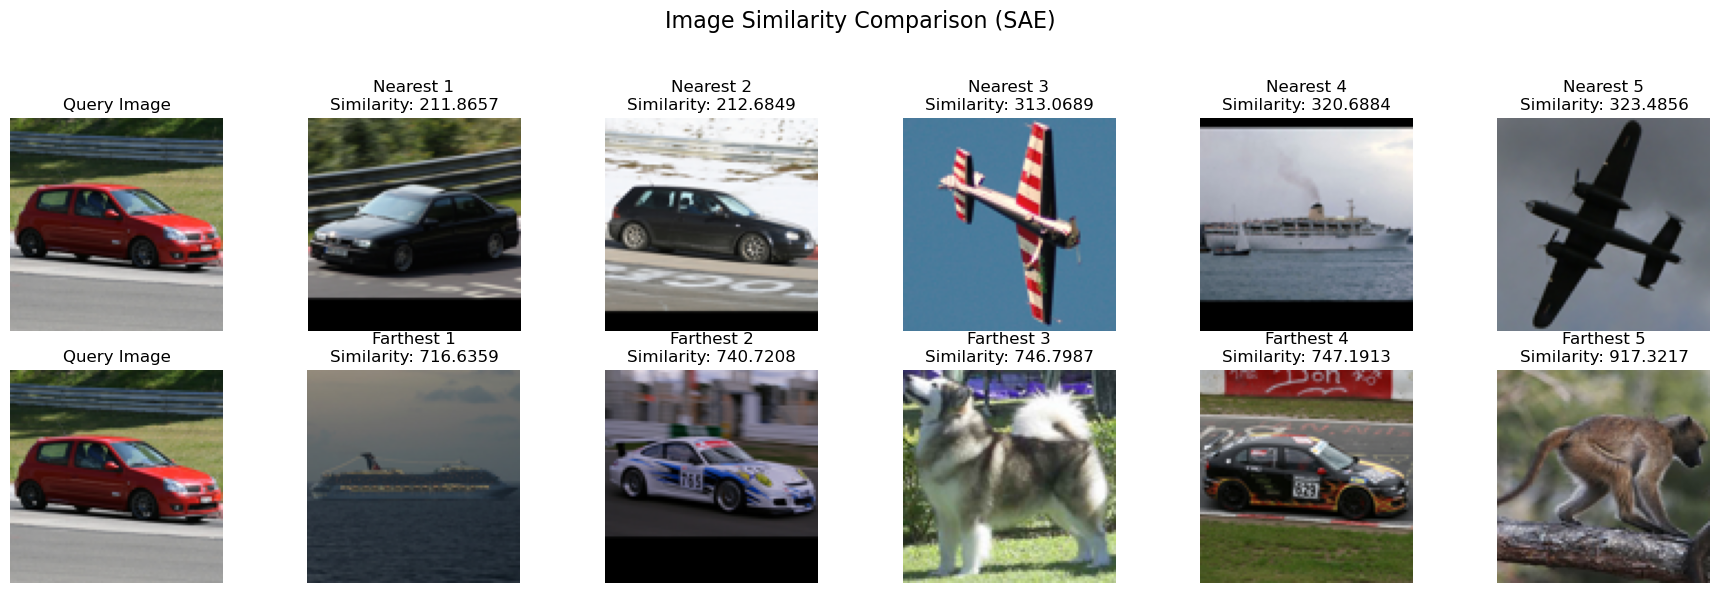

In [14]:
query_image_idx = 69
query_activation = sae_activations[query_image_idx].unsqueeze(0)
nearest_idx, nearest_similarities, farthest_idx, fartherst_similarities = find_neighbours_sae(
    query_activation.detach().numpy(), 
    sae_activations.detach().numpy(), 
    query_image_idx
)
visualize_neighbours_with_distances(
    samples, 
    query_idx=query_image_idx,
    nearest_indices=nearest_idx, 
    nearest_similarities=nearest_similarities,
    farthest_indices=farthest_idx, 
    farthest_similarities=fartherst_similarities,
    title="Image Similarity Comparison (SAE)"
)